# Introduction

# 📊 Final Project Data Science: Prediksi GPA Mahasiswa

## 🧠 Introduction

Proyek ini merupakan bagian dari Final Project kelas **Data Science Beginner** di KSM Android UPN Veteran Jakarta.  
Kami membangun model machine learning untuk **memprediksi nilai GPA (Indeks Prestasi)** mahasiswa berdasarkan data kebiasaan, psikologi, dan performa akademik mereka.

Dataset yang digunakan diambil dari [**Kaggle**](https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset), yang berisi informasi lengkap tentang faktor-faktor yang memengaruhi performa akademik mahasiswa.

---

## 🎯 Tujuan Proyek

✅ Melakukan **Exploratory Data Analysis (EDA)** terhadap data kebiasaan dan performa akademik mahasiswa  
✅ Membersihkan, memproses, dan menyiapkan data untuk regresi  
✅ Melatih dan mengevaluasi model machine learning menggunakan random forest  
✅ Membuat aplikasi interaktif dengan **Streamlit** untuk melakukan prediksi GPA secara real-time

---

## 📁 Deskripsi Dataset

- **Sumber**: [Student Habits and Academic Performance Dataset](https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset)  
- **Jumlah Data**: 8000 baris × 31 kolom  
- **Jenis Tugas**: *Regresi*

Beberapa fitur yang dipilih setelah seleksi fitur :
- 'semester' Semester mahasiswa saat ini,
- "age": Umur mahasiswa,
- "exam_score": Nilai ujian,
- "attendance_percentage": Persentase kehadiran,
- "stress_level": Levels stress (semakin tinggi semakin berat stress),
- "mental_health_rating": Level kesehatan mental (semkain tinggi, kesehatan mental semakin baik),
- "parental_support_level": Level dukungan orangtua,
- "motivation_level": Level motivasi,
- "study_hours_per_day": Jam belajar per hari,
- "time_management_score": Skor manajemen waktu,
- "sleep_hours": Jam tidur per hari,
- "screen_time": Screen time per hari,
- "social_media_hours": Jam penggunaan sosial media per hari,
- "netflix_hours": Jam penggunaan netlif per hari,
- "exercise_frequency": Frekuensi olahraga,

> 🧩 **Target Prediksi**: `GPA` mahasiswa selanjutnya

---

## 🛠️ Metodologi

- 🔍 Exploratory Data Analysis (EDA) dengan `Seaborn` & `Matplotlib`
- 📊 Preprocessing: imputasi, encoding, scaling
- 🌲 Model: `RandomForestRegressor` untuk seleksi fitur terbaik
- 📉 Evaluasi: `RMSE`, `R² Score`, dan visualisasi residual
- 📦 Deployment: menggunakan `Streamlit` dan `joblib`

---

## 🔮 Output yang Diharapkan

Dengan aplikasi ini, pengguna dapat:
- Mengisi data input berdasarkan kebiasaan dan performa mahasiswa
- Mendapatkan **prediksi GPA secara instan**
- Menggunakan model sebagai alat bantu prediktif bagi mahasiswa, dosen, atau akademisi

---

## 🚀 Teknologi yang Digunakan

- `Python` (pandas, numpy, sklearn, seaborn, matplotlib)
- `Streamlit` untuk pembuatan aplikasi web interaktif
- `Joblib` untuk serialisasi model
- `GitHub` & `Streamlit Cloud` untuk deployment

---

## Hasil testing

- RMSE : 0.1630
- R squared : 0.8763

---

## 👨‍💻 Link Aplikasi

➡️ **[Coba Aplikasinya di Streamlit](https://nama-streamlit-app.streamlit.app/)**  
➡️ **[Lihat Repository GitHub](https://github.com/username/nama-repo)**

---

## 🧑‍🤝‍🧑 Penyusun

Anggota kelompok:

1. Eva Sabrina
2. Alya Nurmala Dewi
3. Dea Radita Indayani

---



# Data Collecting

Extract data from csv to Data Frame

In [2]:
# Extract data from csv to data frame

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Set option to display all columns
pd.set_option('display.max_columns', None)

df = pd.read_csv("student_habits_performance_dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       80000 non-null 

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,previous_gpa,semester,stress_level,dropout_risk,social_activity,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,Poor,3,Some College,High,6.0,Yes,4.00,5,5.8,No,0,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,Good,4,PhD,Low,6.8,No,4.00,7,5.8,No,5,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,Good,4,High School,Low,5.7,Yes,3.79,4,8.0,No,5,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,Fair,3,Master,Medium,8.5,Yes,4.00,6,4.6,No,3,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,Good,6,PhD,Low,9.2,No,4.00,4,5.7,No,2,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


Terdapat 31 kolom dan 8000 baris

# Exploratory Data Analysis and Pre-processing

In [3]:
# Check data types in all column
print(df.dtypes)

student_id                         int64
age                                int64
gender                            object
major                             object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating             float64
extracurricular_participation     object
previous_gpa                     float64
semester                           int64
stress_level                     float64
dropout_risk                      object
social_activity                    int64
screen_time                      float64
study_environment                 object
access_to_tutoring                object
family_income_ra

Dari hasil di atas, kita dapat drop 2 field :
1. student_id : karena ini hanya berupa key penanda siswa dan tidak memiliki arti apa-apa
2. dropout_risk : ini dapat mengakibatkan data leakage karena merupakan hasil perhitungan dari variable lainnya.

In [4]:
# Drop irrelevant column
df.drop(['student_id', 'dropout_risk'], axis=1, inplace=True)

print("Data setelah fitur tidak relevan dihapus : ")
print(df.info());

Data setelah fitur tidak relevan dihapus : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            80000 non-null  int64  
 1   gender                         80000 non-null  object 
 2   major                          80000 non-null  object 
 3   study_hours_per_day            80000 non-null  float64
 4   social_media_hours             80000 non-null  float64
 5   netflix_hours                  80000 non-null  float64
 6   part_time_job                  80000 non-null  object 
 7   attendance_percentage          80000 non-null  float64
 8   sleep_hours                    80000 non-null  float64
 9   diet_quality                   80000 non-null  object 
 10  exercise_frequency             80000 non-null  int64  
 11  parental_education_level       80000 non-null  object 
 12  in

In [5]:
# Check for missing value
print("Missing values in df:\n", df.isnull().sum())

Missing values in df:
 age                              0
gender                           0
major                            0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
previous_gpa                     0
semester                         0
stress_level                     0
social_activity                  0
screen_time                      0
study_environment                0
access_to_tutoring               0
family_income_range              0
parental_support_level           0
motivation_level                 0
exam_anxiety_score               0
learning_style                   0
time_management_score           

In [6]:
# Check for duplicate
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


In [7]:
# Hapus duplikat dan NaN
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            80000 non-null  int64  
 1   gender                         80000 non-null  object 
 2   major                          80000 non-null  object 
 3   study_hours_per_day            80000 non-null  float64
 4   social_media_hours             80000 non-null  float64
 5   netflix_hours                  80000 non-null  float64
 6   part_time_job                  80000 non-null  object 
 7   attendance_percentage          80000 non-null  float64
 8   sleep_hours                    80000 non-null  float64
 9   diet_quality                   80000 non-null  object 
 10  exercise_frequency             80000 non-null  int64  
 11  parental_education_level       80000 non-null  object 
 12  internet_quality               80000 non-null 

In [8]:
# Descriptive statistics
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,stress_level,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,22.004288,4.174388,2.501366,1.997754,69.967884,7.017417,3.516587,6.804107,3.602448,4.497338,5.012478,2.500225,9.673029,5.479438,5.488525,8.508475,5.499132,89.141350
std,3.745570,2.004135,1.445441,1.155992,17.333015,1.467377,2.291575,1.921579,0.462876,2.295312,1.953174,1.704292,2.780869,2.873327,2.867782,1.796411,2.603534,11.591497
min,16.000000,0.000000,0.000000,0.000000,40.000000,4.000000,0.000000,1.000000,1.640000,1.000000,1.000000,0.000000,0.300000,1.000000,1.000000,5.000000,1.000000,36.000000
25%,19.000000,2.800000,1.200000,1.000000,55.000000,6.000000,2.000000,5.500000,3.270000,2.000000,3.600000,1.000000,7.800000,3.000000,3.000000,7.000000,3.200000,82.000000
50%,22.000000,4.125624,2.500000,2.000000,69.900000,7.000000,4.000000,6.900000,3.790000,5.000000,5.000000,2.000000,9.700000,5.000000,5.000000,10.000000,5.500000,93.000000
75%,25.000000,5.500000,3.800000,3.000000,84.900000,8.000000,6.000000,8.200000,4.000000,7.000000,6.400000,4.000000,11.600000,8.000000,8.000000,10.000000,7.800000,100.000000
max,28.000000,12.000000,5.000000,4.000000,100.000000,12.000000,7.000000,10.000000,4.000000,8.000000,10.000000,5.000000,21.000000,10.000000,10.000000,10.000000,10.000000,100.000000


Dari hasil di atas seluruh field memiliki batas yang masih wajar.

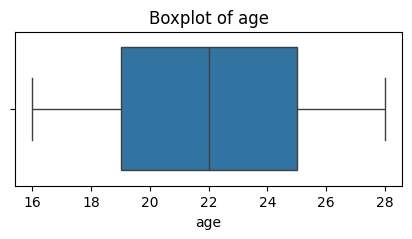

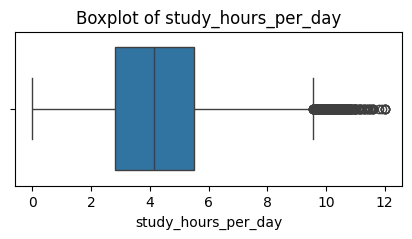

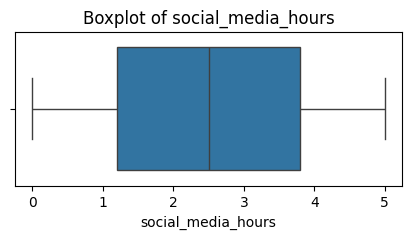

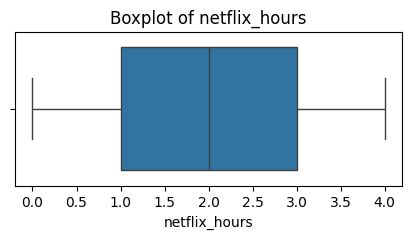

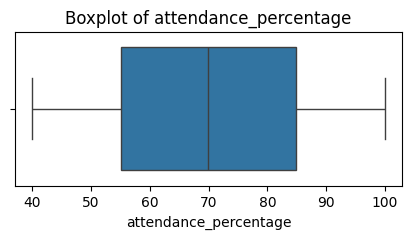

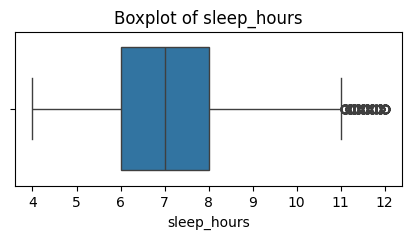

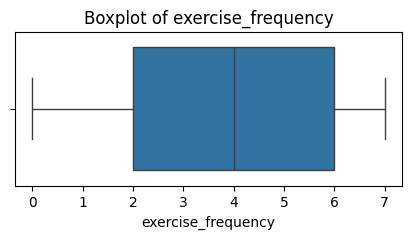

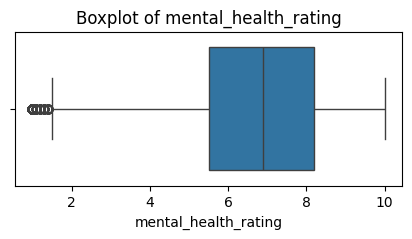

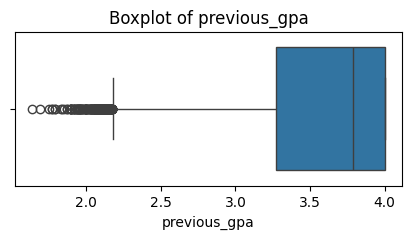

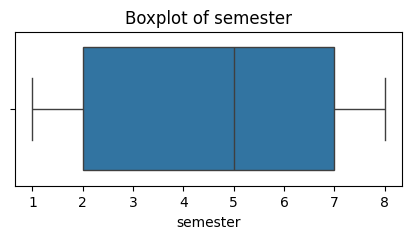

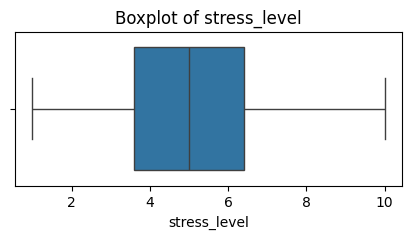

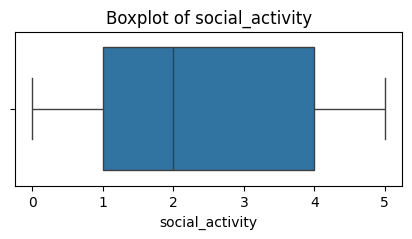

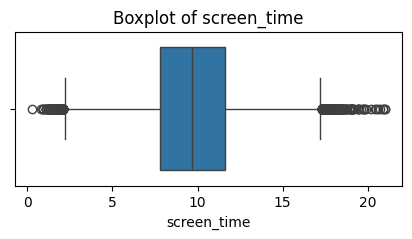

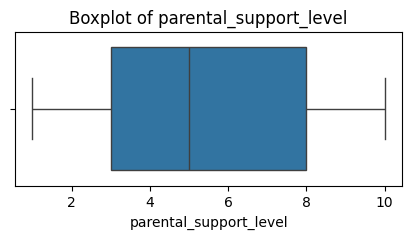

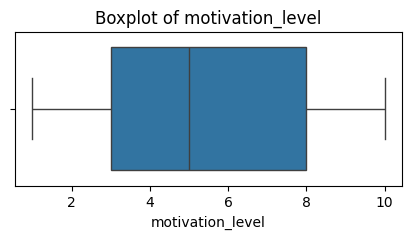

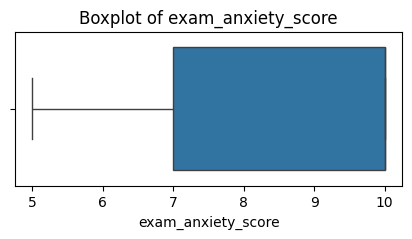

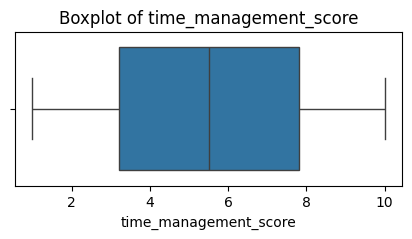

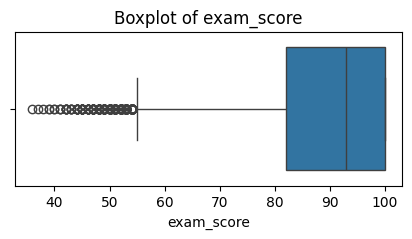

In [9]:
# Cek outlier dengan boxplot
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Terdapat beberapa outlier, namun karena kita menggunakan random forest yang tidak sensitif terhadap outlier maka dapat kita biarkan.


gender value counts:
gender
Female    26705
Male      26698
Other     26597
Name: count, dtype: int64


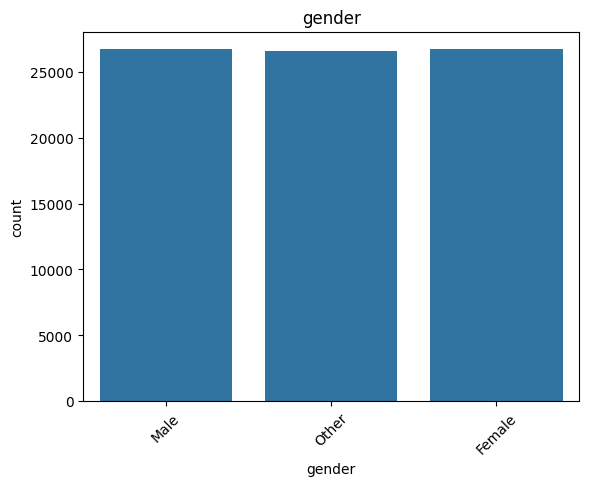


major value counts:
major
Arts                13505
Psychology          13437
Computer Science    13352
Business            13276
Engineering         13229
Biology             13201
Name: count, dtype: int64


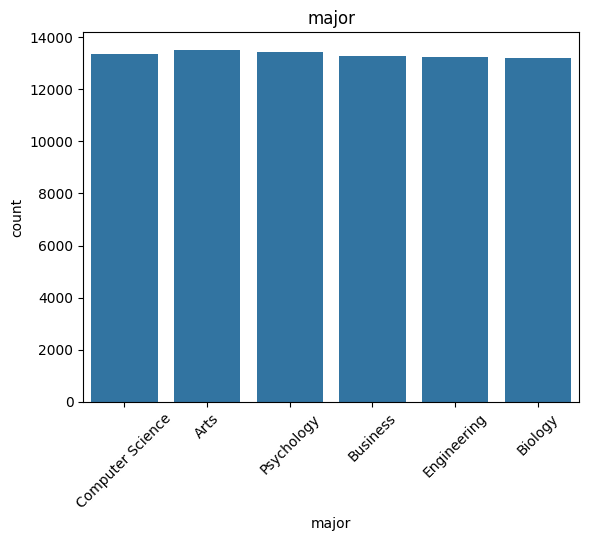


part_time_job value counts:
part_time_job
No     40195
Yes    39805
Name: count, dtype: int64


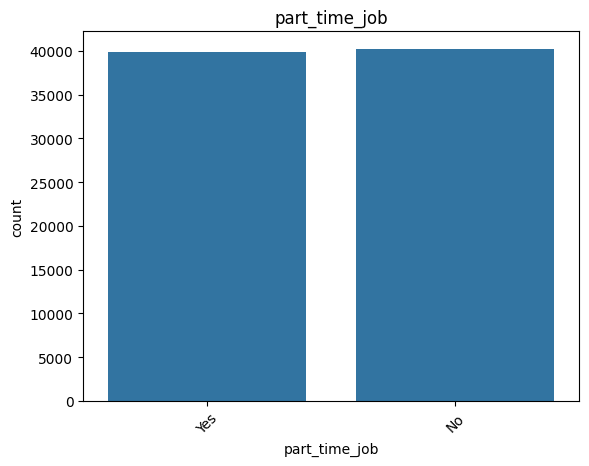


diet_quality value counts:
diet_quality
Good    39935
Fair    26713
Poor    13352
Name: count, dtype: int64


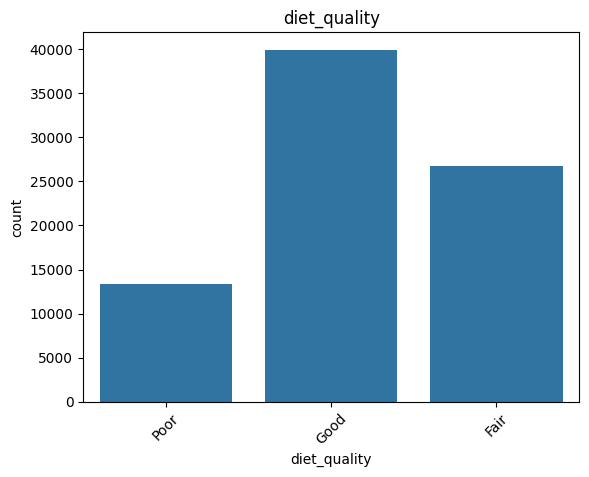


parental_education_level value counts:
parental_education_level
Some College    16115
High School     16106
Bachelor        15986
Master          15908
PhD             15885
Name: count, dtype: int64


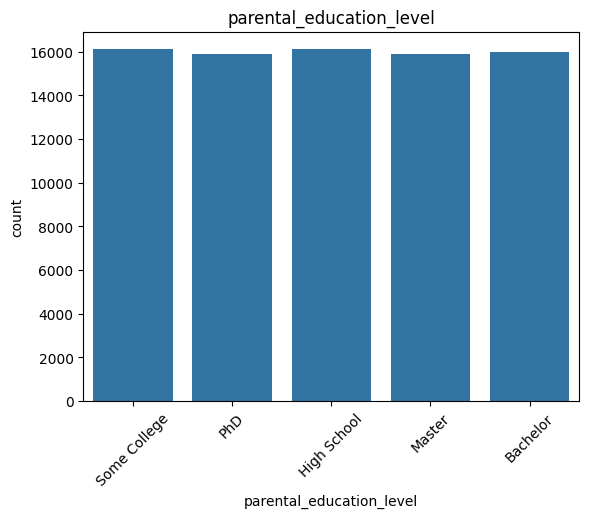


internet_quality value counts:
internet_quality
High      26749
Low       26714
Medium    26537
Name: count, dtype: int64


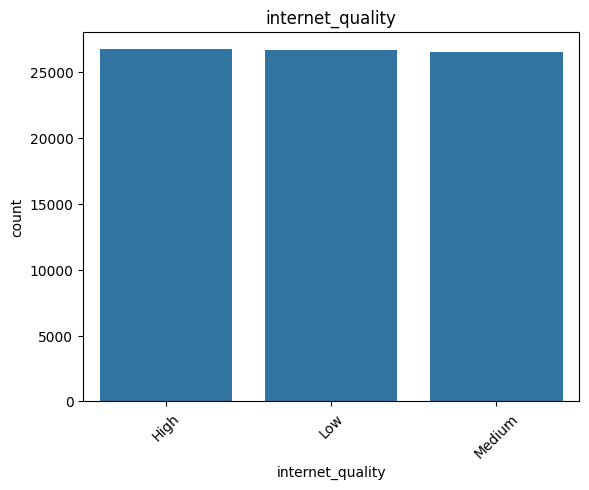


extracurricular_participation value counts:
extracurricular_participation
No     40058
Yes    39942
Name: count, dtype: int64


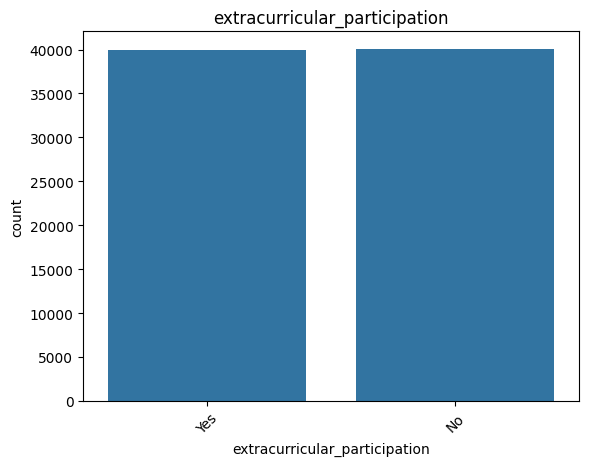


study_environment value counts:
study_environment
Dorm                 16119
Cafe                 16038
Quiet Room           15991
Co-Learning Group    15949
Library              15903
Name: count, dtype: int64


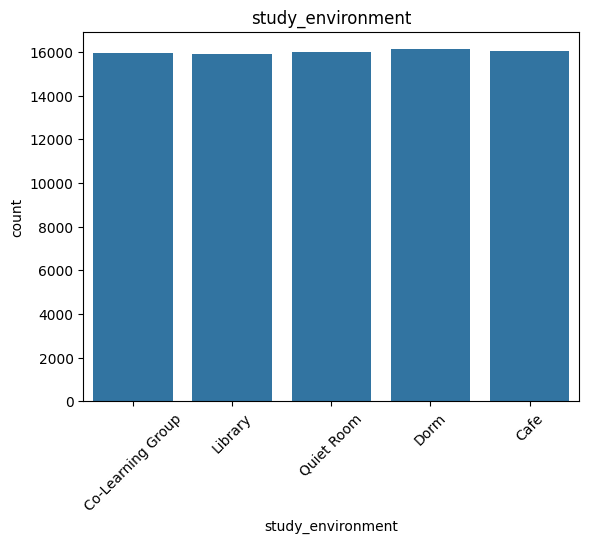


access_to_tutoring value counts:
access_to_tutoring
No     40039
Yes    39961
Name: count, dtype: int64


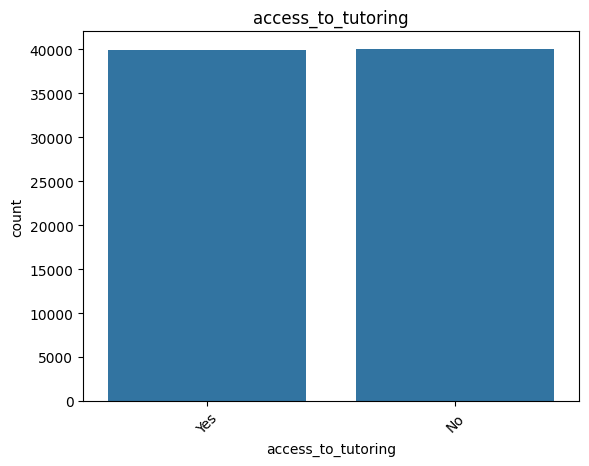


family_income_range value counts:
family_income_range
Low       26720
High      26653
Medium    26627
Name: count, dtype: int64


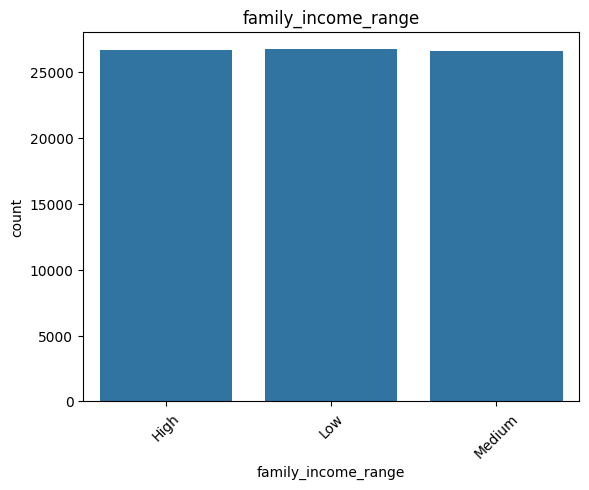


learning_style value counts:
learning_style
Kinesthetic    20143
Visual         20058
Reading        19997
Auditory       19802
Name: count, dtype: int64


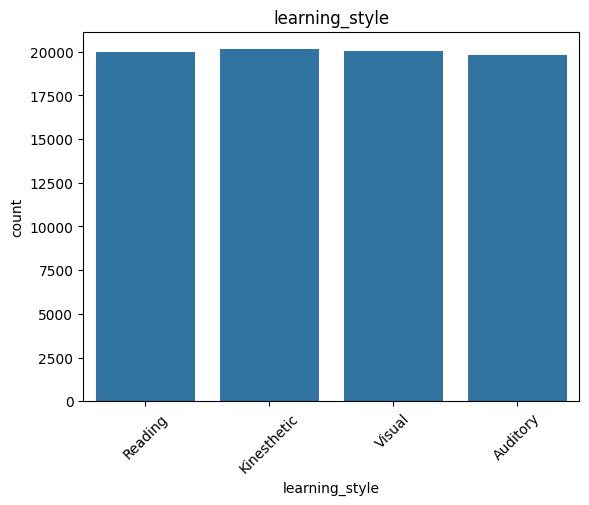

In [10]:
# Melihat distribusi pada data kategorikal
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

Dari hasil di atas kita bisa melihat bahwa distribusi pada data kategorikal hampir merata kecuali diet_quality.

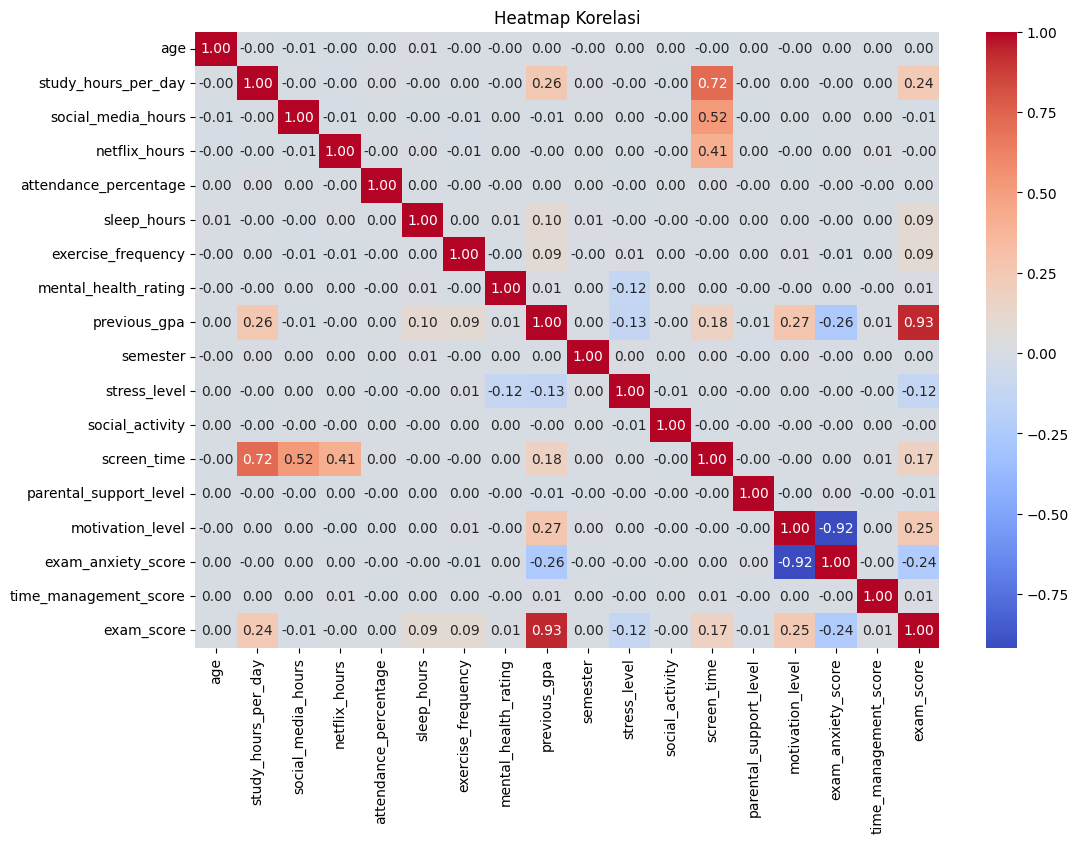

In [11]:
# Membuat heatmap korelasi

# Ambil field yang numerik saja
df_numerik = df.select_dtypes(include=['int64', 'float64'])

# Buat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df_numerik.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

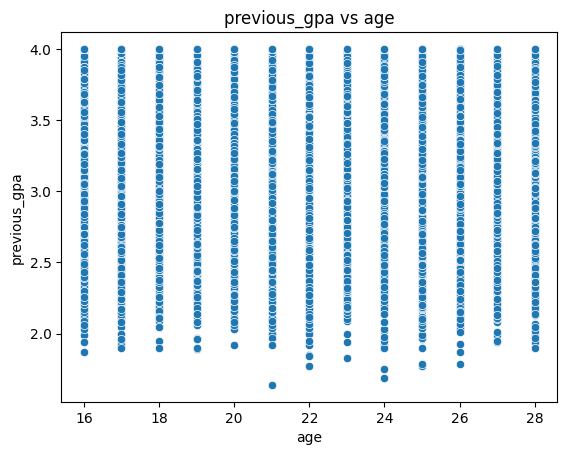

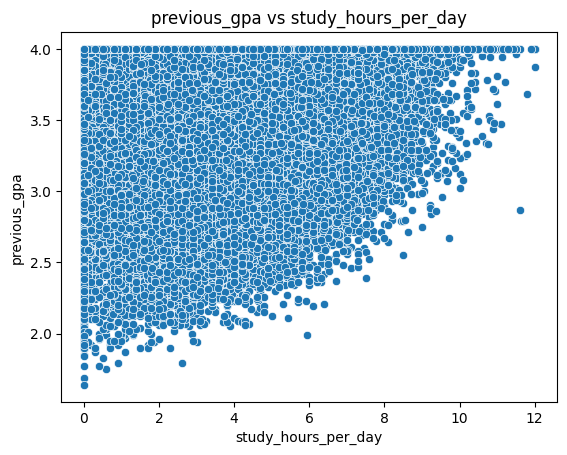

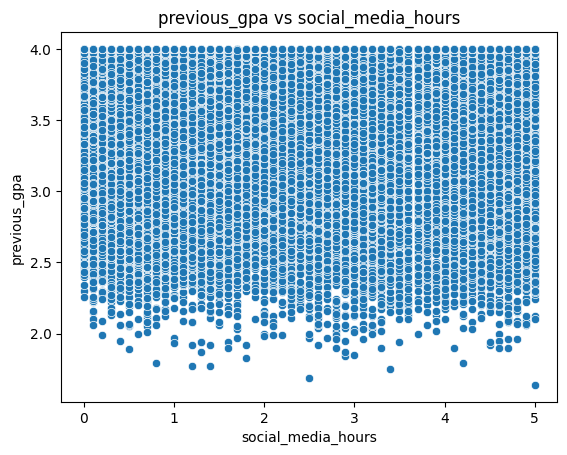

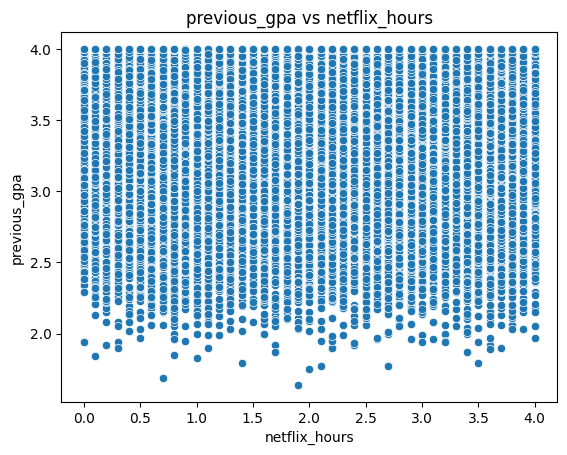

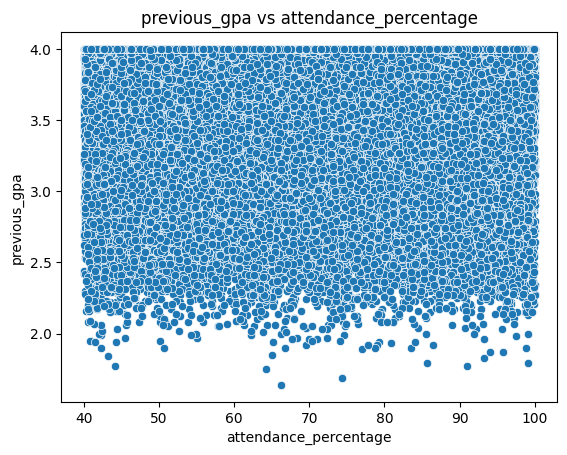

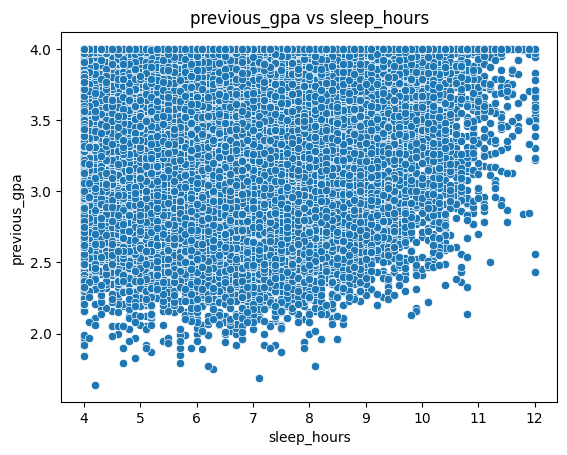

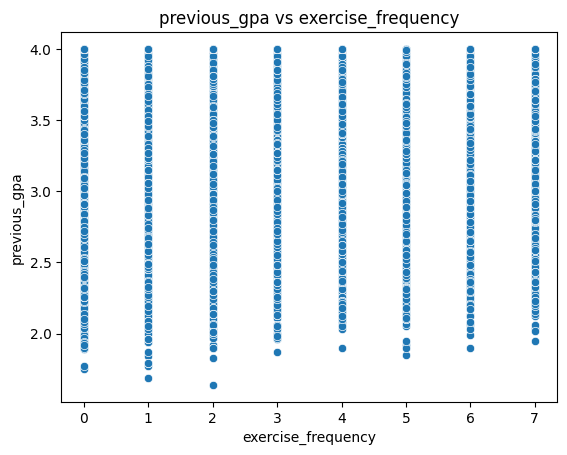

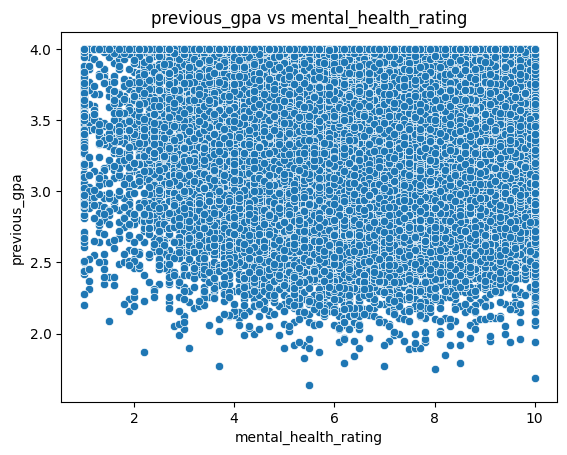

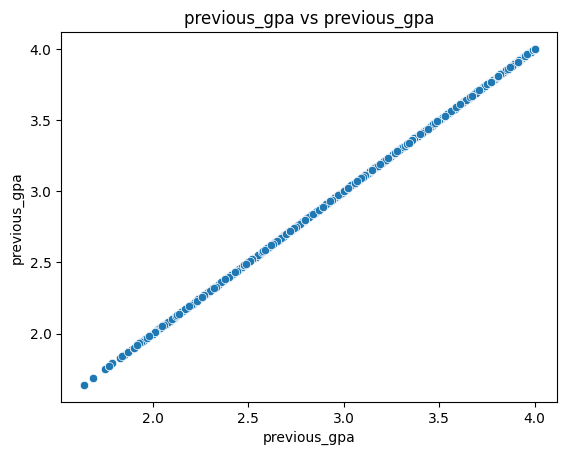

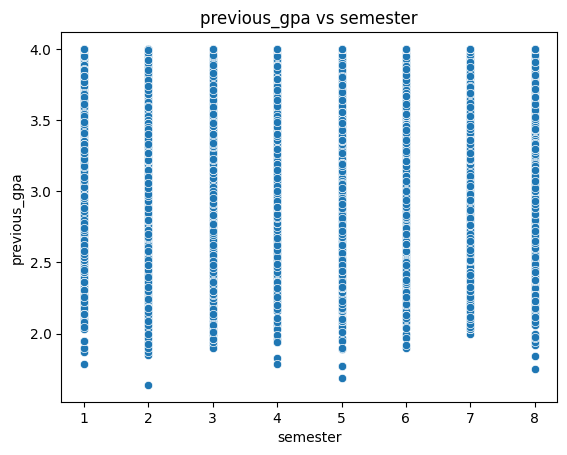

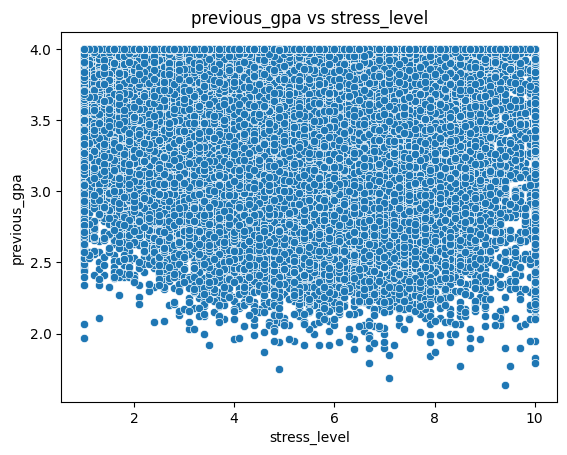

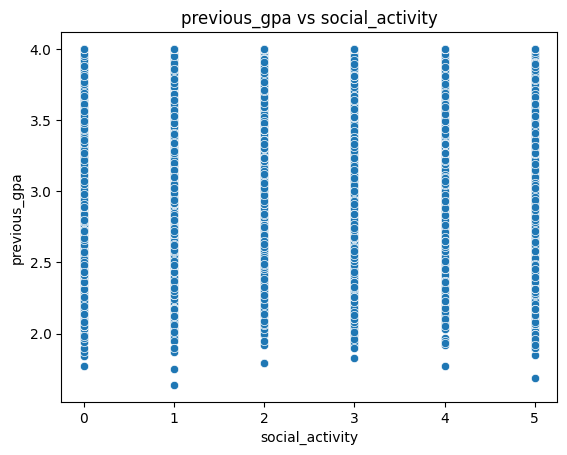

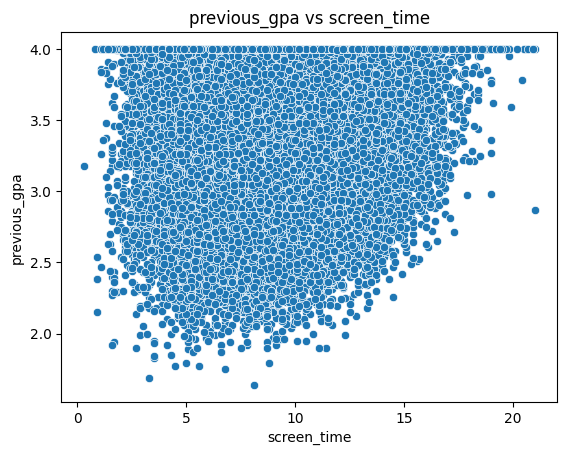

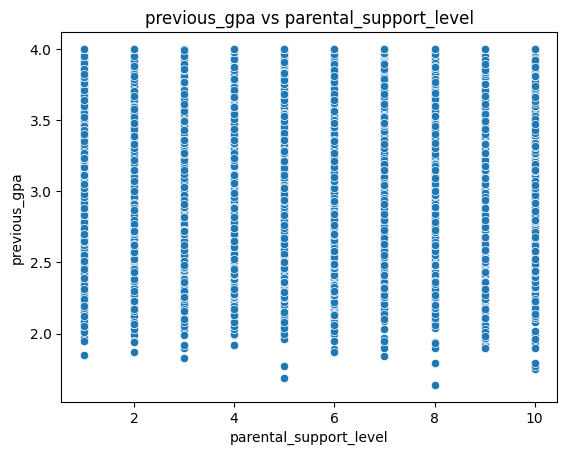

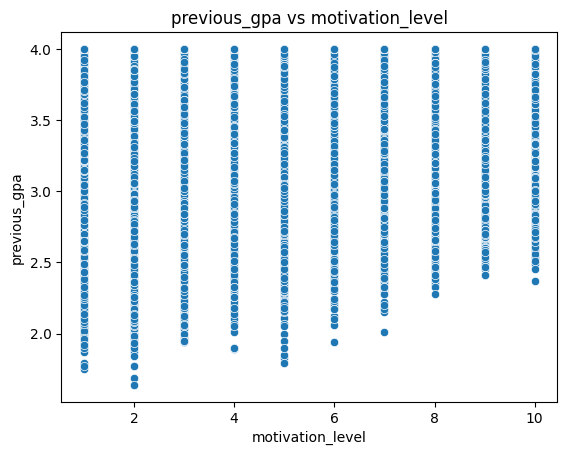

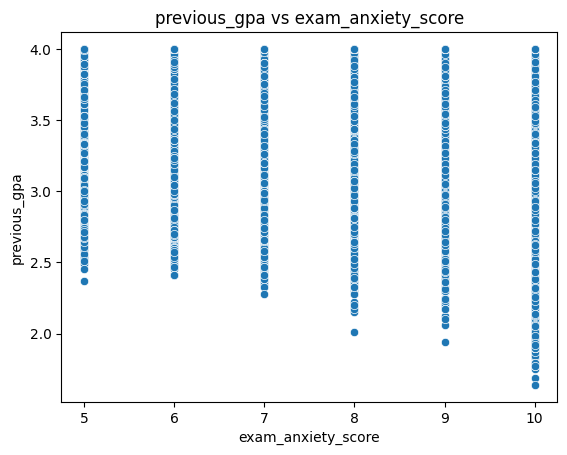

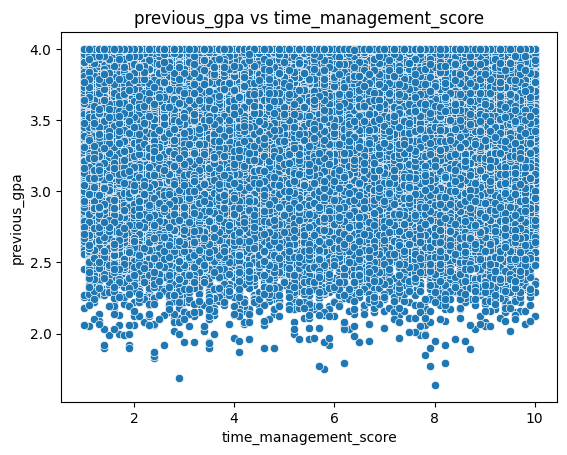

In [12]:
# Scatterplot bivariate dengan exam_score
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('exam_score')

for col in numerical_cols:
    sns.scatterplot(x=df[col], y=df['previous_gpa'])
    plt.title(f'previous_gpa vs {col}')
    plt.show()

In [13]:
# Korelasi terhadap previous_gpa
correlation = df.corr(numeric_only=True)['previous_gpa'].sort_values(ascending=False)
print("Korelasi terhadap previous_gpa:\n", correlation)

Korelasi terhadap previous_gpa:
 previous_gpa              1.000000
exam_score                0.932940
motivation_level          0.270758
study_hours_per_day       0.257445
screen_time               0.180460
sleep_hours               0.097282
exercise_frequency        0.092738
mental_health_rating      0.011431
time_management_score     0.007474
attendance_percentage     0.002926
semester                  0.000558
age                       0.000487
social_activity          -0.002079
netflix_hours            -0.002506
parental_support_level   -0.006603
social_media_hours       -0.007078
stress_level             -0.127729
exam_anxiety_score       -0.255692
Name: previous_gpa, dtype: float64


Dari korelasi ini kita bisa melihat beberapa field memiliki nilai korelasi mendekati 0 yang artinya memiliki hubungan yang sangat kecil dengan exam score. Akan tetapi, karena kita akan menggunakan RFE dan jumlah field sekarang masih normal, maka kita tidak men-dropnya sekarang, tetapi membiarkan RFE nanti yang akan mengeliminasi.

Kelemahan dari keputusan ini adalah training RFE akan menjadi semakin lama.


Visualizing Exam Score Distribution by Categorical Features:


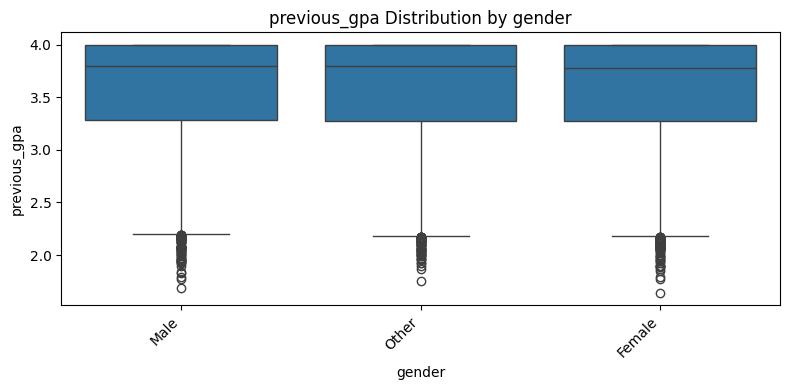

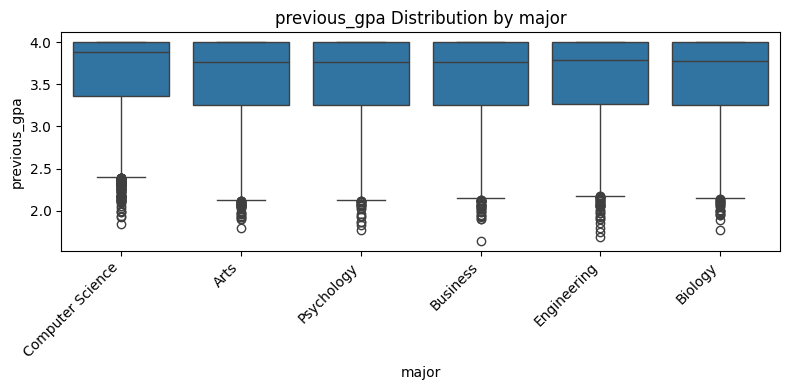

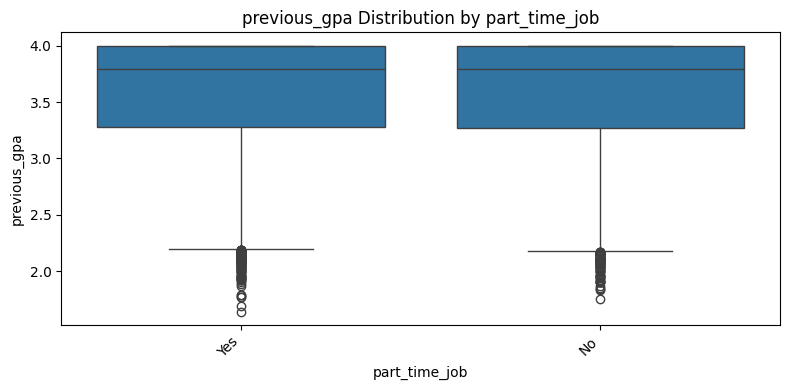

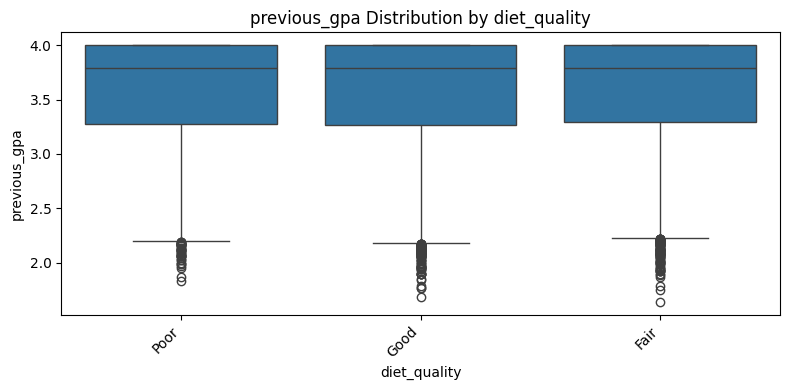

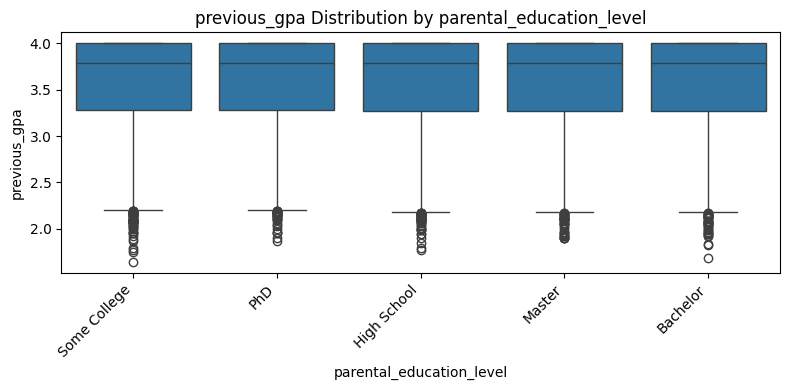

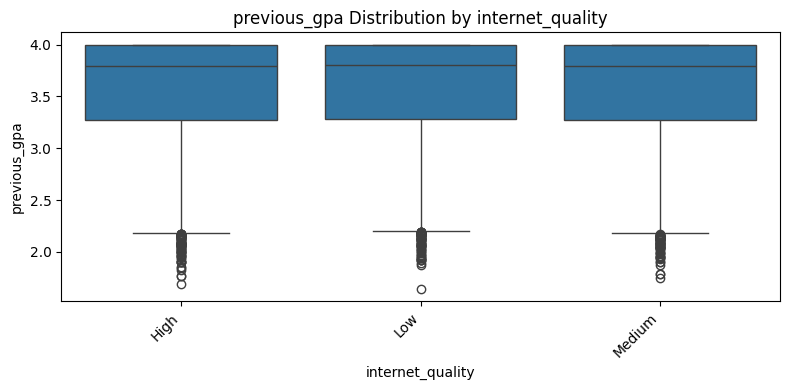

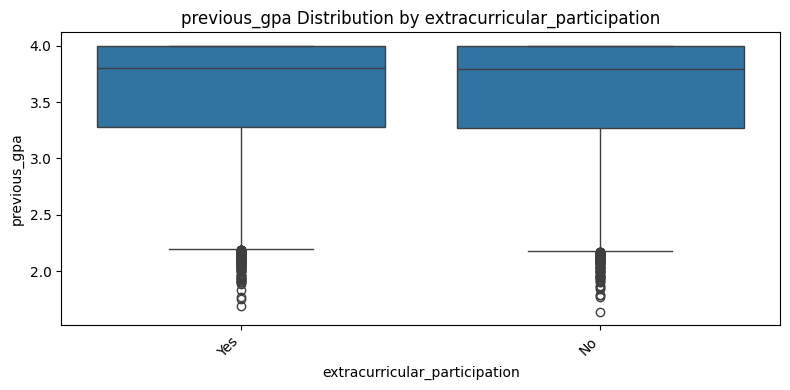

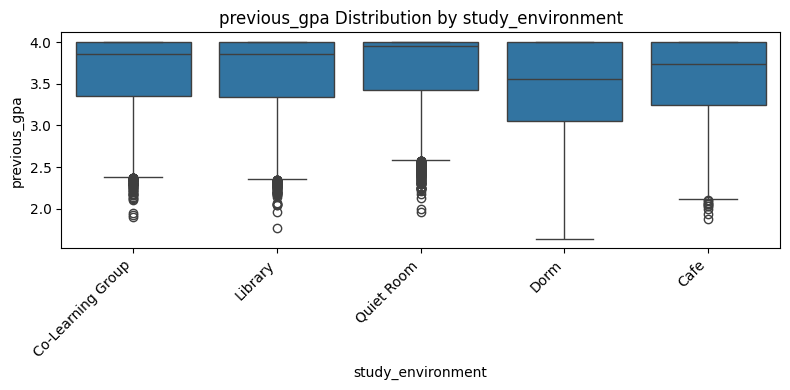

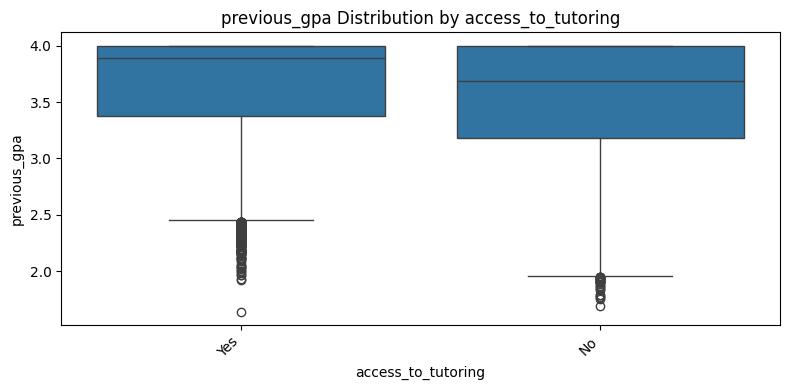

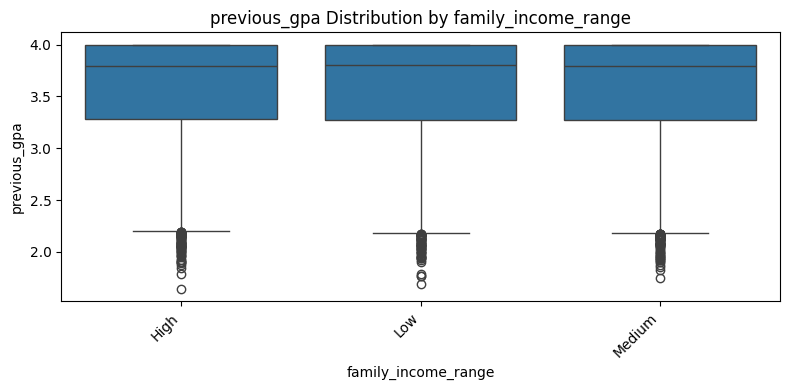

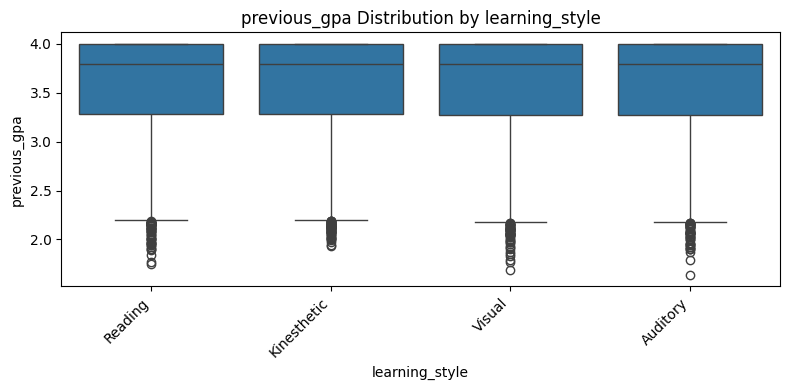

In [14]:
# Mengextract kolom yang memiliki tipe data object (data kategorikal)
categorical_cols = df.select_dtypes(include='object').columns

# Menghilangkan kolom exam_score jika masih ada di categorical_cols karena merupakan target akhir kita
if 'exam_score' in categorical_cols:
    categorical_cols = categorical_cols.drop('previous_gpa')


print("\nVisualizing Exam Score Distribution by Categorical Features:")

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='previous_gpa', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'previous_gpa Distribution by {col}')
    plt.tight_layout()
    plt.show()

In [15]:
# Melakukan uji ANOVA pada data kategorikal
from scipy import stats
import pandas as pd

print("\nPerforming ANOVA for Categorical Features vs. previous_gpa:")

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    unique_categories = df[col].dropna().unique()

    # Periksa jika ada NaNs di previous_gpa
    category_groups = [df['previous_gpa'][df[col] == cat].dropna() for cat in unique_categories]

    if len(category_groups) >= 2 and all(len(group) > 0 for group in category_groups):
        fvalue, pvalue = stats.f_oneway(*category_groups)

        print(f"\nANOVA for '{col}':")
        print(f"  F-value: {fvalue:.4f}")
        print(f"  P-value: {pvalue:.4f}")

        alpha = 0.05 # Standar signifikansi
        if pvalue < alpha:
            print(f"  Result: Statistically significant relationship (p < {alpha}). This feature likely contributes to predicting previous_gpa.")
        else:
            print(f"  Result: No statistically significant relationship (p >= {alpha}). This feature may not be a strong predictor of previous_gpa.")
    else:
        print(f"\nSkipping ANOVA for '{col}': Not enough groups or data for the test.")




Performing ANOVA for Categorical Features vs. previous_gpa:

ANOVA for 'gender':
  F-value: 0.3764
  P-value: 0.6864
  Result: No statistically significant relationship (p >= 0.05). This feature may not be a strong predictor of previous_gpa.

ANOVA for 'major':
  F-value: 36.4876
  P-value: 0.0000
  Result: Statistically significant relationship (p < 0.05). This feature likely contributes to predicting previous_gpa.

ANOVA for 'part_time_job':
  F-value: 0.4152
  P-value: 0.5194
  Result: No statistically significant relationship (p >= 0.05). This feature may not be a strong predictor of previous_gpa.

ANOVA for 'diet_quality':
  F-value: 2.1695
  P-value: 0.1142
  Result: No statistically significant relationship (p >= 0.05). This feature may not be a strong predictor of previous_gpa.

ANOVA for 'parental_education_level':
  F-value: 0.4090
  P-value: 0.8023
  Result: No statistically significant relationship (p >= 0.05). This feature may not be a strong predictor of previous_gpa.

A

Hanya terdapat beberapa field yang signifikan berdasarkan uji anova, namun karena kita akan menggunakan random forest, kita akan membiarkannya disini.

In [16]:
# Pisahkan fitur dan target
X = df.drop('previous_gpa', axis=1)
y = df['previous_gpa']

print("Fitur :")
X.info()

print("\n\nTarget :")
y.info()

Fitur :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            80000 non-null  int64  
 1   gender                         80000 non-null  object 
 2   major                          80000 non-null  object 
 3   study_hours_per_day            80000 non-null  float64
 4   social_media_hours             80000 non-null  float64
 5   netflix_hours                  80000 non-null  float64
 6   part_time_job                  80000 non-null  object 
 7   attendance_percentage          80000 non-null  float64
 8   sleep_hours                    80000 non-null  float64
 9   diet_quality                   80000 non-null  object 
 10  exercise_frequency             80000 non-null  int64  
 11  parental_education_level       80000 non-null  object 
 12  internet_quality               80000 n

In [17]:
# Persiapan ke encoding data kategorikal
categorical_cols_X = X.select_dtypes(include='object').columns

# Mengambil isi dari data kategorik
print("Kategori unik untuk setiap kolom kategorikal: \n\n")

for col in categorical_cols_X:
    unique_values = X[col].unique()
    print(f"{col}: {unique_values}")

Kategori unik untuk setiap kolom kategorikal: 


gender: ['Male' 'Other' 'Female']
major: ['Computer Science' 'Arts' 'Psychology' 'Business' 'Engineering' 'Biology']
part_time_job: ['Yes' 'No']
diet_quality: ['Poor' 'Good' 'Fair']
parental_education_level: ['Some College' 'PhD' 'High School' 'Master' 'Bachelor']
internet_quality: ['High' 'Low' 'Medium']
extracurricular_participation: ['Yes' 'No']
study_environment: ['Co-Learning Group' 'Library' 'Quiet Room' 'Dorm' 'Cafe']
access_to_tutoring: ['Yes' 'No']
family_income_range: ['High' 'Low' 'Medium']
learning_style: ['Reading' 'Kinesthetic' 'Visual' 'Auditory']


Dari hasil unik isi data kategorikal di atas, kita bisa melihat bahwa terdapat jenis data nominal dan ordinal.

Ordinal
1. diet_quality -> Poor < Fair < Good
2. parental_educattion_level -> High School < Some College < Bachelor < Master < PhD
3. internet_quality -> Low < Medium < High
4. family_income_range -> Low < Medium < High

In [18]:
# Encoding Data Kategorikal

from sklearn.preprocessing import OrdinalEncoder
import numpy as np

ordinal_cols = ['diet_quality', 'parental_education_level', 'internet_quality', 'family_income_range']
nominal_cols = ['gender', 'major', 'part_time_job', 'extracurricular_participation', 'study_environment', 'access_to_tutoring', 'learning_style']

all_categorical_X = list(X.select_dtypes(include='object').columns)
print(f"Semua kolom kategorikal di X: {all_categorical_X}")
print(f"Kolom Ordinal yang diidentifikasi: {ordinal_cols}")
print(f"Kolom Nominal yang diidentifikasi: {nominal_cols}")

# Cek apakah ada kolom kategorikal yang terlewat
missing_cols = [col for col in all_categorical_X if col not in ordinal_cols + nominal_cols]
if missing_cols:
    print(f"PERINGATAN: Kolom kategorikal berikut tidak ada dalam daftar ordinal_cols atau nominal_cols: {missing_cols}")

# Urutan Kategori untuk Kolom Ordinal
try:
    ordinal_categories_order = [
        ['Poor', 'Fair', 'Good'],
        ['High School', 'Some College', 'Bachelor', 'Master', 'PhD'],
        ['Low', 'Medium', 'High'],
        ['Low', 'Medium', 'High']
    ]

    # Inisialisasi dan Terapkan Ordinal Encoding
    ordinal_encoder = OrdinalEncoder(categories=ordinal_categories_order,
                                     handle_unknown='use_encoded_value', unknown_value=-1)

    X_ordinal_encoded = ordinal_encoder.fit_transform(X[ordinal_cols])

    X_ordinal_encoded = pd.DataFrame(X_ordinal_encoded, columns=ordinal_cols, index=X.index)

    print("\nOrdinal Encoding Selesai.")

except ValueError as e:
    print(f"\nERROR: Terjadi kesalahan saat Ordinal Encoding")
    print(f"Detail Error: {e}")
    raise

X_nominal_encoded = pd.get_dummies(X[nominal_cols], columns=nominal_cols, drop_first=True)

print("One-Hot Encoding Nominal Selesai.")

numeric_cols_X = X.select_dtypes(include=['number']).columns

X_encoded = pd.concat([X[numeric_cols_X], X_ordinal_encoded, X_nominal_encoded], axis=1)

print("\nEncoding Lengkap. Info DataFrame X setelah Encoding:")
X_encoded.info()
print("\nPeriksa beberapa baris awal hasil :")
print(X_encoded.head())

X = X_encoded

Semua kolom kategorikal di X: ['gender', 'major', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'study_environment', 'access_to_tutoring', 'family_income_range', 'learning_style']
Kolom Ordinal yang diidentifikasi: ['diet_quality', 'parental_education_level', 'internet_quality', 'family_income_range']
Kolom Nominal yang diidentifikasi: ['gender', 'major', 'part_time_job', 'extracurricular_participation', 'study_environment', 'access_to_tutoring', 'learning_style']

Ordinal Encoding Selesai.
One-Hot Encoding Nominal Selesai.

Encoding Lengkap. Info DataFrame X setelah Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  80000 non-null  int64  
 1   study_hours_per_day                 

In [19]:
X.info()

X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  80000 non-null  int64  
 1   study_hours_per_day                  80000 non-null  float64
 2   social_media_hours                   80000 non-null  float64
 3   netflix_hours                        80000 non-null  float64
 4   attendance_percentage                80000 non-null  float64
 5   sleep_hours                          80000 non-null  float64
 6   exercise_frequency                   80000 non-null  int64  
 7   mental_health_rating                 80000 non-null  float64
 8   semester                             80000 non-null  int64  
 9   stress_level                         80000 non-null  float64
 10  social_activity                      80000 non-null  int64  
 11  screen_time                 

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,semester,stress_level,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score,diet_quality,parental_education_level,internet_quality,family_income_range,gender_Male,gender_Other,major_Biology,major_Business,major_Computer Science,major_Engineering,major_Psychology,part_time_job_Yes,extracurricular_participation_Yes,study_environment_Co-Learning Group,study_environment_Dorm,study_environment_Library,study_environment_Quiet Room,access_to_tutoring_Yes,learning_style_Kinesthetic,learning_style_Reading,learning_style_Visual
0,26,7.645367,3.0,0.1,70.3,6.2,3,6.0,5,5.8,0,10.9,9,7,8,3.0,100,0.0,1.0,2.0,2.0,True,False,False,False,True,False,False,True,True,True,False,False,False,True,False,True,False
1,28,5.700000,0.5,0.4,88.4,7.2,4,6.8,7,5.8,5,8.3,7,2,10,6.0,99,2.0,4.0,0.0,0.0,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False
2,17,2.400000,4.2,0.7,82.1,9.2,4,5.7,4,8.0,5,8.0,3,9,6,7.6,98,2.0,0.0,0.0,2.0,True,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False
3,27,3.400000,4.6,2.3,79.3,4.2,3,8.5,6,4.6,3,11.7,5,3,10,3.2,100,1.0,3.0,1.0,0.0,False,True,False,False,False,False,True,True,True,True,False,False,False,True,False,True,False
4,25,4.700000,0.8,2.7,62.9,6.5,6,9.2,4,5.7,2,9.4,9,1,10,7.1,98,2.0,4.0,0.0,1.0,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,True,False


In [20]:
# Memisahkan data training dan data testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Data berhasil dipisahkan!")
print(f"Jumlah baris di X_train: {len(X_train)}")
print(f"Jumlah baris di X_test: {len(X_test)}")
print(f"Jumlah baris di y_train: {len(y_train)}")
print(f"Jumlah baris di y_test: {len(y_test)}")

print("\nInfo X_train:")
X_train.info()

print("\nInfo X_test:")
X_test.info()

Data berhasil dipisahkan!
Jumlah baris di X_train: 64000
Jumlah baris di X_test: 16000
Jumlah baris di y_train: 64000
Jumlah baris di y_test: 16000

Info X_train:
<class 'pandas.core.frame.DataFrame'>
Index: 64000 entries, 3822 to 15795
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  64000 non-null  int64  
 1   study_hours_per_day                  64000 non-null  float64
 2   social_media_hours                   64000 non-null  float64
 3   netflix_hours                        64000 non-null  float64
 4   attendance_percentage                64000 non-null  float64
 5   sleep_hours                          64000 non-null  float64
 6   exercise_frequency                   64000 non-null  int64  
 7   mental_health_rating                 64000 non-null  float64
 8   semester                             64000 non-null  int64  
 9  

# Data modelling and evaluation

In [21]:
# Model Training & Evaluation with Feature Selection Comparison

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Lists untuk menyimpan hasil evaluasi
rmse_scores = []
r2_scores = []

Untuk mempersingkat waktu pelatihan, kita akan melakukan sekali pelatihan untuk mengambil fitur sejumlah seluruh fitur yang ada. Setelah itu akan diambil urutan feature importancenya.

Dari urutan tersebut, akan dibuat model dengan berbagai kombinasi jumlah fitur kemudian melakukan testing terhadap model-model tersebut. Hasil terbaik akan diambil sebagai model akhir.

In [22]:
# Latih model Random Forest Regressor pada SEMUA fitur
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

print("Melatih model Random Forest pada SEMUA fitur untuk mendapatkan Feature Importance...")

# Inisialisasi model Random Forest Regressor
initial_rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Gunakan n_estimators yang sama atau sesuai

# Latih model pada seluruh data pelatihan (X_train mencakup semua fitur setelah encoding)
initial_rf_model.fit(X_train, y_train)

print("Model dilatih. Mendapatkan Feature Importance...")

# Ambil skor feature importance
feature_importances = initial_rf_model.feature_importances_

# Buat DataFrame untuk menyimpan nama fitur dan skor pentingnya
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\nPeringkat Fitur Berdasarkan Importance (dari tertinggi ke terendah):")
print(feature_importance_df)

Melatih model Random Forest pada SEMUA fitur untuk mendapatkan Feature Importance...
Model dilatih. Mendapatkan Feature Importance...

Peringkat Fitur Berdasarkan Importance (dari tertinggi ke terendah):
                                feature  importance
16                           exam_score    0.876918
1                   study_hours_per_day    0.009948
4                 attendance_percentage    0.008943
9                          stress_level    0.008720
15                time_management_score    0.008087
5                           sleep_hours    0.008002
7                  mental_health_rating    0.007821
11                          screen_time    0.007251
2                    social_media_hours    0.006894
3                         netflix_hours    0.006829
0                                   age    0.004963
12               parental_support_level    0.004517
6                    exercise_frequency    0.004307
13                     motivation_level    0.004289
8               

In [23]:
print("\nMenguji performa model dengan jumlah fitur teratas yang berbeda...")

# Rentang jumlah fitur teratas yang akan diuji
min_features_to_test = 1
max_features_to_test = min(15, X_train.shape[1]) # Batasi hingga 30 atau jumlah fitur total
step_test = 1

n_features_range_test = range(min_features_to_test, max_features_to_test + 1, step_test)

test_rmse_scores = []
test_r2_scores = []
tested_feature_counts = []

for n_features_count in n_features_range_test:
    print(f"  Menguji dengan {n_features_count} fitur teratas...")

    # Ambil nama fitur teratas berdasarkan peringkat
    top_features = feature_importance_df['feature'].head(n_features_count).tolist()

    # Ambil subset data pelatihan dan pengujian hanya dengan fitur teratas ini
    X_train_subset = X_train[top_features]
    X_test_subset = X_test[top_features]

    # Latih model Random Forest pada subset fitur teratas ini
    model_subset = RandomForestRegressor(n_estimators=100, random_state=42)
    model_subset.fit(X_train_subset, y_train)

    # Prediksi pada data pengujian dengan subset fitur teratas
    y_pred_subset = model_subset.predict(X_test_subset)

    # Hitung metrik evaluasi
    mse_subset = mean_squared_error(y_test, y_pred_subset)
    rmse_subset = np.sqrt(mse_subset)
    r2_subset = r2_score(y_test, y_pred_subset)

    # Simpan hasil
    tested_feature_counts.append(n_features_count)
    test_rmse_scores.append(rmse_subset)
    test_r2_scores.append(r2_subset)

print("\nPengujian subset fitur teratas selesai.")


Menguji performa model dengan jumlah fitur teratas yang berbeda...
  Menguji dengan 1 fitur teratas...
  Menguji dengan 2 fitur teratas...
  Menguji dengan 3 fitur teratas...
  Menguji dengan 4 fitur teratas...
  Menguji dengan 5 fitur teratas...
  Menguji dengan 6 fitur teratas...
  Menguji dengan 7 fitur teratas...
  Menguji dengan 8 fitur teratas...
  Menguji dengan 9 fitur teratas...
  Menguji dengan 10 fitur teratas...
  Menguji dengan 11 fitur teratas...
  Menguji dengan 12 fitur teratas...
  Menguji dengan 13 fitur teratas...
  Menguji dengan 14 fitur teratas...
  Menguji dengan 15 fitur teratas...

Pengujian subset fitur teratas selesai.


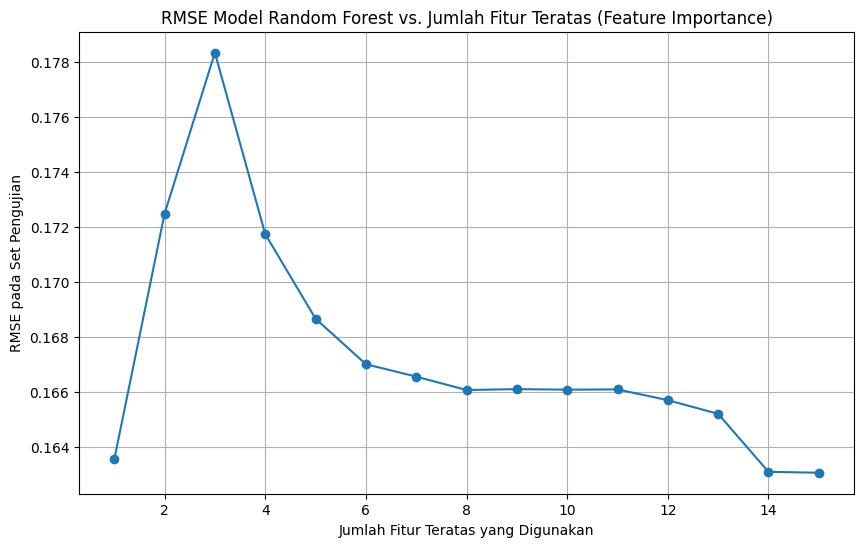

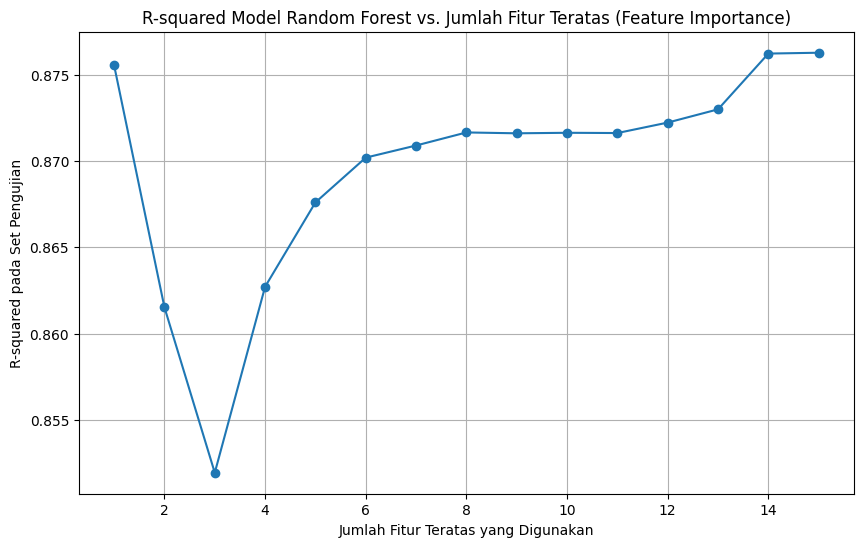

In [24]:
# Visualisasi Hasil Pengujian Subset Fitur Teratas
# Plot RMSE vs Jumlah Fitur Teratas
plt.figure(figsize=(10, 6))
plt.plot(tested_feature_counts, test_rmse_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Fitur Teratas yang Digunakan")
plt.ylabel("RMSE pada Set Pengujian")
plt.title("RMSE Model Random Forest vs. Jumlah Fitur Teratas (Feature Importance)")
plt.grid(True)
plt.show()

# Plot R-squared vs Jumlah Fitur Teratas
plt.figure(figsize=(10, 6))
plt.plot(tested_feature_counts, test_r2_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Fitur Teratas yang Digunakan")
plt.ylabel("R-squared pada Set Pengujian")
plt.title("R-squared Model Random Forest vs. Jumlah Fitur Teratas (Feature Importance)")
plt.grid(True)
plt.show()

In [25]:
print(test_rmse_scores)

print(test_r2_scores)

[np.float64(0.1635312543721535), np.float64(0.17247971056670386), np.float64(0.1783390112836797), np.float64(0.17173577390323463), np.float64(0.16865650223160683), np.float64(0.166998394473944), np.float64(0.1665463544088402), np.float64(0.1660582149014315), np.float64(0.1660905351720862), np.float64(0.1660713354932151), np.float64(0.16608053988577348), np.float64(0.1656888534120506), np.float64(0.16519143774156395), np.float64(0.16307982146789343), np.float64(0.1630474671261409)]
[0.875524943566086, 0.8615296387422048, 0.8519618991694631, 0.8627215588912853, 0.8676003081615784, 0.8701908256842401, 0.8708926232093923, 0.8716483293751098, 0.8715983617846684, 0.8716280459292581, 0.8716138156757403, 0.8722186768224969, 0.8729847515900699, 0.8762112292111813, 0.8762603426681546]


In [26]:
# Menggabungkan jumlah fitur dan skor R-squared
r2_results = list(zip(tested_feature_counts, test_r2_scores))

# Mengurutkan berdasarkan skor R-squared (indeks 1), dari tertinggi ke terendah (reverse=True)
r2_results_sorted = sorted(r2_results, key=lambda item: item[1], reverse=True)

print("\nHasil R-squared berdasarkan jumlah fitur (Tertinggi ke Terendah):")
for num_features, r2_score in r2_results_sorted:
    print(f"Jumlah Fitur: {num_features}, R-squared: {r2_score:.4f}")

rmse_results = list(zip(tested_feature_counts, test_rmse_scores))

rmse_results_sorted = sorted(rmse_results, key=lambda item: item[1])

print("\nHasil RMSE berdasarkan jumlah fitur (Terendah ke Tertinggi):")
for num_features, rmse_score in rmse_results_sorted:
    print(f"Jumlah Fitur: {num_features}, RMSE: {rmse_score:.4f}")


Hasil R-squared berdasarkan jumlah fitur (Tertinggi ke Terendah):
Jumlah Fitur: 15, R-squared: 0.8763
Jumlah Fitur: 14, R-squared: 0.8762
Jumlah Fitur: 1, R-squared: 0.8755
Jumlah Fitur: 13, R-squared: 0.8730
Jumlah Fitur: 12, R-squared: 0.8722
Jumlah Fitur: 8, R-squared: 0.8716
Jumlah Fitur: 10, R-squared: 0.8716
Jumlah Fitur: 11, R-squared: 0.8716
Jumlah Fitur: 9, R-squared: 0.8716
Jumlah Fitur: 7, R-squared: 0.8709
Jumlah Fitur: 6, R-squared: 0.8702
Jumlah Fitur: 5, R-squared: 0.8676
Jumlah Fitur: 4, R-squared: 0.8627
Jumlah Fitur: 2, R-squared: 0.8615
Jumlah Fitur: 3, R-squared: 0.8520

Hasil RMSE berdasarkan jumlah fitur (Terendah ke Tertinggi):
Jumlah Fitur: 15, RMSE: 0.1630
Jumlah Fitur: 14, RMSE: 0.1631
Jumlah Fitur: 1, RMSE: 0.1635
Jumlah Fitur: 13, RMSE: 0.1652
Jumlah Fitur: 12, RMSE: 0.1657
Jumlah Fitur: 8, RMSE: 0.1661
Jumlah Fitur: 10, RMSE: 0.1661
Jumlah Fitur: 11, RMSE: 0.1661
Jumlah Fitur: 9, RMSE: 0.1661
Jumlah Fitur: 7, RMSE: 0.1665
Jumlah Fitur: 6, RMSE: 0.1670
Juml

Dari hasil, kita bisa lihat bahwa kualitas tertinggi pada R squared dan RMSE ada pada jumlah fitur 15.

In [32]:
# Extract model dan selected_featurenya

import joblib

top_features = feature_importance_df['feature'].head(15).tolist()

# Ambil subset data pelatihan dan pengujian hanya dengan fitur teratas ini
X_train_subset = X_train[top_features]
X_test_subset = X_test[top_features]

# Latih model Random Forest pada subset fitur teratas ini
model_subset = RandomForestRegressor(n_estimators=100, random_state=42)
model_subset.fit(X_train_subset, y_train)

joblib.dump(model_subset, 'model_rf.pkl', compress=5)

selected_features = feature_importance_df['feature'].head(15).tolist()
joblib.dump(selected_features, 'selected_features.pkl')

['selected_features.pkl']